In [3]:
import os
import numpy as np
import pandas as pd
from collections import Counter
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

### Image Classification Project
#### Vincent Heningburg and Ashlee Pounds
#### Fruits 360 Dataset from Kaggle

#### Project consists of creating a convulotional neural network to identify 131 different fruits and vegetables.

In [9]:
# dimensions of our images.
img_width, img_height = 100, 100

train_data_dir = 'data/fruits-360/Training'
test_data_dir = 'data/fruits-360/Test'
nb_train_samples = 67692
nb_test_samples = 22688
epochs = 50
batch_size = 16

In [3]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

### Model Summary

In [16]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'))
# model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [17]:
model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [18]:
model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [19]:
model.add(Flatten())
model.add(Dense(64, activation='relu'))
# model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(131, activation='softmax'))
# model.add(Activation('softmax'))

In [21]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)             

### Reading the data.

In [10]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [11]:
# this is the augmentation configuration we will use for testing:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [12]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 67692 images belonging to 131 classes.


In [13]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 22688 images belonging to 131 classes.


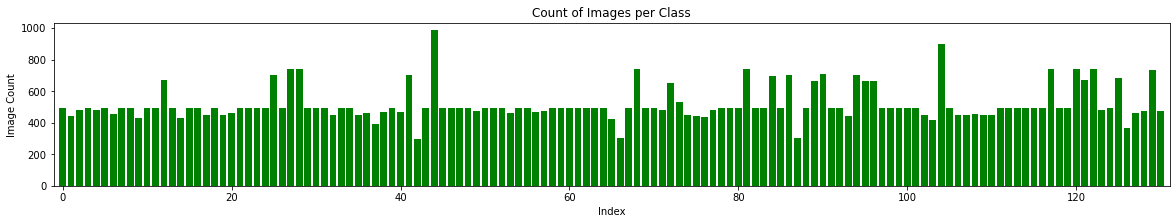

In [50]:
plt.figure(figsize=(20,3))
plt.margins(x = .005)
plt.bar(Counter(train_generator.labels).keys(), Counter(train_generator.labels).values(), color='green')
plt.xlabel("Index")
plt.ylabel("Image Count")
plt.title("Count of Images per Class")
plt.savefig('templates/static/images/bar_chart.jpg')
plt.show()

In [37]:
test_keys = list(test_generator.class_indices.keys())
test_values = list(Counter(train_generator.labels).values())
explain = {test_keys[i]: [f"Index: {i}", f"Count: {test_values[i]}"] for i in range(len(test_keys))}
explain

{'Apple Braeburn': ['Index: 0', 'Count: 492'],
 'Apple Crimson Snow': ['Index: 1', 'Count: 444'],
 'Apple Golden 1': ['Index: 2', 'Count: 480'],
 'Apple Golden 2': ['Index: 3', 'Count: 492'],
 'Apple Golden 3': ['Index: 4', 'Count: 481'],
 'Apple Granny Smith': ['Index: 5', 'Count: 492'],
 'Apple Pink Lady': ['Index: 6', 'Count: 456'],
 'Apple Red 1': ['Index: 7', 'Count: 492'],
 'Apple Red 2': ['Index: 8', 'Count: 492'],
 'Apple Red 3': ['Index: 9', 'Count: 429'],
 'Apple Red Delicious': ['Index: 10', 'Count: 490'],
 'Apple Red Yellow 1': ['Index: 11', 'Count: 492'],
 'Apple Red Yellow 2': ['Index: 12', 'Count: 672'],
 'Apricot': ['Index: 13', 'Count: 492'],
 'Avocado': ['Index: 14', 'Count: 427'],
 'Avocado ripe': ['Index: 15', 'Count: 491'],
 'Banana': ['Index: 16', 'Count: 490'],
 'Banana Lady Finger': ['Index: 17', 'Count: 450'],
 'Banana Red': ['Index: 18', 'Count: 490'],
 'Beetroot': ['Index: 19', 'Count: 450'],
 'Blueberry': ['Index: 20', 'Count: 462'],
 'Cactus fruit': ['Index

### Fitting the model.

In [22]:
history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=nb_test_samples // batch_size)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 4230 steps, validate for 1418 steps
Epoch 1/50
4230/4230 [==============================] - 460s 109ms/step - loss: 1.4478 - accuracy: 0.5834 - val_loss: 0.4723 - val_accuracy: 0.8616
Epoch 2/50
4230/4230 [==============================] - 454s 107ms/step - loss: 0.5415 - accuracy: 0.8174 - val_loss: 0.2813 - val_accuracy: 0.9333
Epoch 3/50
4230/4230 [==============================] - 450s 106ms/step - loss: 0.4026 - accuracy: 0.8635 - val_loss: 0.2601 - val_accuracy: 0.9402
Epoch 4/50
4230/4230 [==============================] - 449s 106ms/step - loss: 0.3284 - accuracy: 0.8901 - val_loss: 0.2462 - val_accuracy: 0.9527
Epoch 5/50
4230/4230 [==============================] - 450s 106ms/step - loss: 0.2911 - accuracy: 0.9017 - val_loss: 0.2141 - val_accuracy: 0.9601
Epoch 6/50
4230/4230 [==============================] - 445s 105ms/step - loss: 0.2564 - accuracy: 0.9137 - val_loss: 0.1931 - val_accuracy: 0.9577
Epoch 7/50
4230/

In [30]:
acc = history.history['accuracy']
loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

In [31]:
#We wont need this since we can pull the data straight from the cell above

with open('model_metrics/accuracy.txt', 'w') as filehandle:
    for listitem in acc:
        filehandle.write('%s\n' % listitem)
with open('model_metrics/loss.txt', 'w') as filehandle:
    for listitem in loss:
        filehandle.write('%s\n' % listitem)
with open('model_metrics/test_accuracy.txt', 'w') as filehandle:
    for listitem in test_acc:
        filehandle.write('%s\n' % listitem)
with open('model_metrics/test_loss.txt', 'w') as filehandle:
    for listitem in test_loss:
        filehandle.write('%s\n' % listitem)

In [42]:
#This just pulls in the files. We wont need to write it to txt 
#or do the below if we are getting it straight from the history object

text_file = open("model_metrics/accuracy.txt", "r")
acc = text_file.read().split('\n')
text_file = open("model_metrics/loss.txt", "r")
loss = text_file.read().split('\n')
text_file = open("model_metrics/test_accuracy.txt", "r")
test_acc = text_file.read().split('\n')
text_file = open("model_metrics/test_loss.txt", "r")
test_loss = text_file.read().split('\n')


#We will need to pop off the last empty element and convert 
#the numbers from there string data type to floats

acc.pop()
acc = np.array(acc)
acc = acc.astype(np.float)

loss.pop()
loss = np.array(loss)
loss = loss.astype(np.float)

test_acc.pop()
test_acc = np.array(test_acc)
test_acc = test_acc.astype(np.float)

test_loss.pop()
test_loss = np.array(test_loss)
test_loss = test_loss.astype(np.float)
    

In [44]:
#Get array of Epoch Numbers for X axis
epochs = []
for i in range (1,51):
    epochs.append(i)

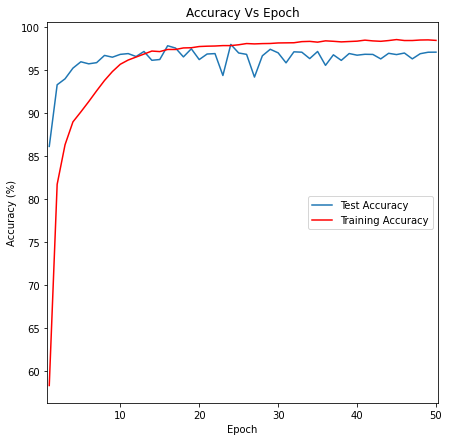

In [51]:
#Test Accuracy and Loss VS epoch
plt.figure(figsize=(7,7))
plt.margins(x = .005)
plt.plot(epochs, test_acc*100)
plt.plot(epochs, acc*100, color = 'r')
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Vs Epoch")
plt.legend(["Test Accuracy","Training Accuracy"],loc=5)
plt.savefig('templates/static/images/acc_chart.png')
plt.show()

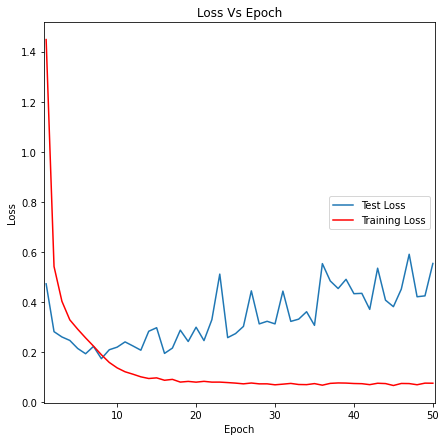

In [52]:
#Test Accuracy and Loss VS epoch
plt.figure(figsize=(7,7))
plt.margins(x = .005)
plt.plot(epochs, test_loss)
plt.plot(epochs, loss, color = 'r')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Vs Epoch")
plt.legend(["Test Loss","Training Loss"],loc=5)
plt.savefig('templates/static/images/loss_chart.png')
plt.show()

In [23]:
model.save("CNN8_3-2.h5")

In [4]:
model = keras.models.load_model('CNN8_3-2.h5')

### Model prediction results.

In [7]:
def predict(image_path, N):
    """Use VGG19 to label image"""
    img = image.load_img(image_path, target_size=(100, 100))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x/255
    predictions = model.predict(x)
    
    classes = np.flip(np.argsort(predictions[0])[-N:])
    prob = predictions[0][classes]
    prob = [f'{x*100: .3f}%' for x in prob]
    labels = list(test_generator.class_indices.keys())
    L = [labels[x] for x in classes]

#     plt.imshow(img)
    print('Predicted:', list(zip(L, prob)))


In [1]:
def show_img(image_path):
    img = image.load_img(image_path, target_size=(100, 100))
    plt.imshow(img)

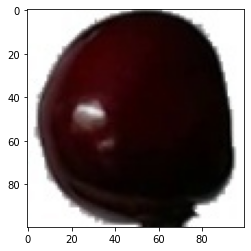

In [5]:
img = 'data/fruits-360/Test/Cherry 1/r_7_100.jpg'
show_img(img)

In [14]:
predict(img, 3)

Predicted: [('Cherry 1', ' 100.000%'), ('Watermelon', ' 0.000%'), ('Grape White 2', ' 0.000%')]


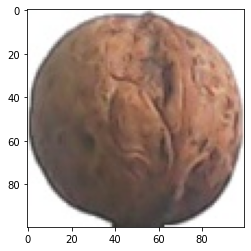

In [15]:
img = 'data/fruits-360/Test/Walnut/109_100.jpg'
show_img(img)

In [16]:
predict(img, 3)

Predicted: [('Walnut', ' 100.000%'), ('Hazelnut', ' 0.000%'), ('Pear Williams', ' 0.000%')]


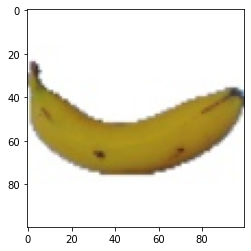

In [17]:
img = 'data/fruits-360/Test/Banana/114_100.jpg'
show_img(img)

In [18]:
predict(img, 3)

Predicted: [('Banana', ' 100.000%'), ('Pear Abate', ' 0.000%'), ('Physalis with Husk', ' 0.000%')]


### Practical test images.

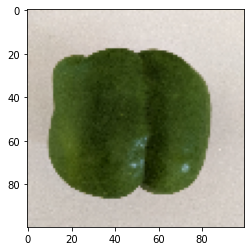

In [19]:
img = 'Pictures/Bell_Pepper.jpg'
show_img(img)

In [21]:
predict(img, 3)

Predicted: [('Avocado', ' 100.000%'), ('Pepper Green', ' 0.000%'), ('Strawberry', ' 0.000%')]


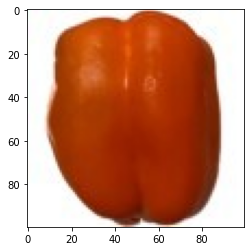

In [30]:
img = 'Pictures/orange_bell_clean.jpg'
show_img(img)

In [31]:
predict(img, 3)

Predicted: [('Pepper Yellow', ' 99.998%'), ('Tomato Yellow', ' 0.002%'), ('Orange', ' 0.000%')]


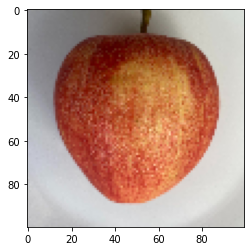

In [32]:
img = 'Pictures/gala_apple.jpg'
show_img(img)

In [33]:
predict(img, 3)

Predicted: [('Kumquats', ' 99.496%'), ('Apple Red Yellow 1', ' 0.502%'), ('Nectarine', ' 0.002%')]


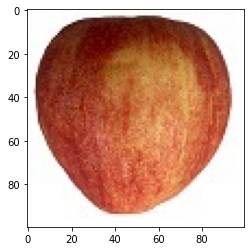

In [34]:
img = 'Pictures/apple_clean.jpg'
show_img(img)

In [35]:
predict(img, 3)

Predicted: [('Apple Red 2', ' 100.000%'), ('Apple Braeburn', ' 0.000%'), ('Apricot', ' 0.000%')]


In [ ]:
model.history()

In [28]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
train_generator.labels

In [ ]:
Counter(train_generator.labels).values()

In [ ]:
Counter(train_generator.labels).keys()